In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [2]:
def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df

In [3]:

small_iris_data = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/small_iris.csv")


In [4]:
small_iris_data.shape

(150, 2)


### ■ Innehåller datan konstiga värden?

Nej det finns inte som ni ser på visualiseringen nedan för dataset som vi jobbar med att det inte finns värde som sticker ut från de övriga de ser ganska ihopslagna ut. annars bör finnas några som sticker ut för att det ska finnas extremtvärde. 

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'petal length (cm)'}>]], dtype=object)

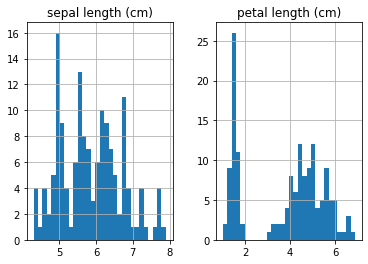

In [5]:
small_iris_data.hist(bins=30)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

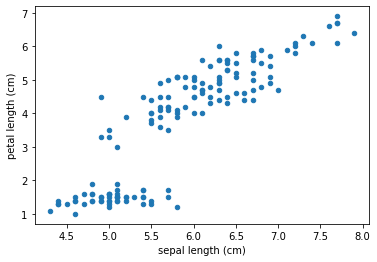

In [6]:

small_iris_data.plot.scatter(x="sepal length (cm)", y = "petal length (cm)")



### ■ Ska några attribut plockas bort?

Nej det behövs inte därför att det finns bara attributer som vi kommer att behöva använda för vår data analys.


### ■ Behövs datan normaliseras?

Normalisering är en teknik som ofta används som en del av förberedelsen av data för maskininlärning. Målet med normaliseringen är att ändra värdena för numeriska kolumner i datauppsättningen så att de använder en gemensam skala,och för att vi inte har några data punkter som sticker ut så det behövs inte heller här någon normalisering.

### Finns dubbletter?

In [7]:
print(f'***Small Iris***\n{small_iris_data.duplicated().value_counts()}')


***Small Iris***
False    123
True      27
dtype: int64


Däremot som vi ser att datan innehåller 27 dubbletter av 150 datapunkter

### Saknas värden?

In [8]:
print(f'***Randomdata***\n{small_iris_data.isna().sum()}')

***Randomdata***
sepal length (cm)    0
petal length (cm)    0
dtype: int64


Det saknas inte någon värde.

In [9]:
small_iris_data.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [10]:

import random
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # This initial method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs


In [11]:
X_train = small_iris_data[['sepal length (cm)','petal length (cm)']]
X_train = pca_transformation(X_train)  
X_train = StandardScaler().fit_transform(X_train)  

Antal kluster nu är ***1***


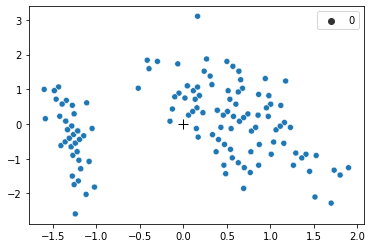

Antal kluster nu är ***2***


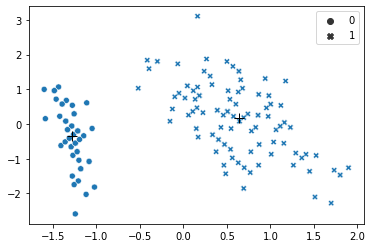

Antal kluster nu är ***3***


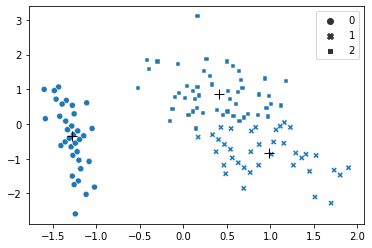

Antal kluster nu är ***4***


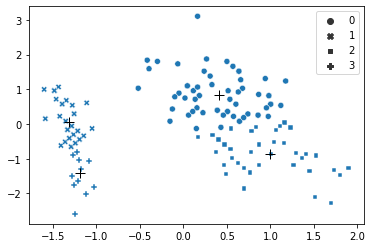

Antal kluster nu är ***5***


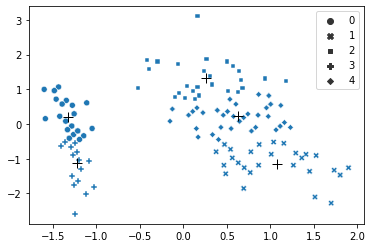

Antal kluster nu är ***10***


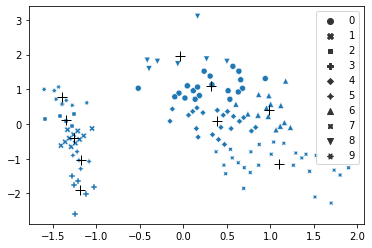

In [65]:
# Fit centroids to dataset

n_culster=[1,2,3,4,5,10]

for h in n_culster:
    print(f'Antal kluster nu är ***{h}***')
    kmeans = KMeans(n_clusters=h)
    kmeans.fit(X_train)
    class_centers, classification = kmeans.evaluate(X_train)
    sns.scatterplot(x=[X[0] for X in X_train], 
                    y=[X[1] for X in X_train],style=classification,)
    plt.plot([x for x, _ in kmeans.centroids],[y for _, y in kmeans.centroids],'k+',markersize=10 )
    plt.show()